In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
cancer = datasets.load_breast_cancer()

In [5]:
X = pd.DataFrame(data = cancer.data, columns=cancer.feature_names)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
y = cancer.target
y.shape

(569,)

In [7]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

X_train.shape, X_test.shape

((455, 30), (114, 30))

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
X_train = X_train.reshape(455,30,1)
X_test = X_test.reshape(114, 30, 1)

In [11]:
X_train.shape


(455, 30, 1)

In [12]:
y= np.zeros((2,3,4))
y

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

In [13]:
epochs = 100

model = Sequential()
model.add(Conv1D(
    filters=32,
    kernel_size=2,
    activation='relu',
    input_shape=(30, 1)
))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 29, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 29, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1792)              0

In [15]:
model.compile(optimizer=Adam(lr=0.00005), loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Train on 455 samples, validate on 114 samples
Epoch 1/100
455/455 [==============================] - 2s 4ms/sample - loss: 1.0361 - accuracy: 0.5626 - val_loss: 0.6739 - val_accuracy: 0.7632
Epoch 2/100
455/455 [==============================] - 0s 284us/sample - loss: 0.6440 - accuracy: 0.7363 - val_loss: 0.6497 - val_accuracy: 0.8333
Epoch 3/100
455/455 [==============================] - 0s 295us/sample - loss: 0.5384 - accuracy: 0.7648 - val_loss: 0.6231 - val_accuracy: 0.8421
Epoch 4/100
455/455 [==============================] - 0s 274us/sample - loss: 0.4218 - accuracy: 0.8308 - val_loss: 0.5940 - val_accuracy: 0.8596
Epoch 5/100
455/455 [==============================] - 0s 270us/sample - loss: 0.3412 - accuracy: 0.8352 - val_loss: 0.5629 - val_accuracy: 0.8772
Epoch 6/100
455/455 [==============================] - 0s 306us/sample - loss: 0.3577 - accuracy: 0.8637 - val_loss: 0.5332 - val_accuracy: 0.8772
Epoch 7/100
455/455 [==============================] - 0s 291us/sample - l

455/455 [==============================] - 0s 277us/sample - loss: 0.1081 - accuracy: 0.9516 - val_loss: 0.1236 - val_accuracy: 0.9474
Epoch 57/100
455/455 [==============================] - 0s 291us/sample - loss: 0.1134 - accuracy: 0.9582 - val_loss: 0.1234 - val_accuracy: 0.9474
Epoch 58/100
455/455 [==============================] - 0s 284us/sample - loss: 0.1039 - accuracy: 0.9670 - val_loss: 0.1234 - val_accuracy: 0.9474
Epoch 59/100
455/455 [==============================] - 0s 268us/sample - loss: 0.0728 - accuracy: 0.9758 - val_loss: 0.1227 - val_accuracy: 0.9561
Epoch 60/100
455/455 [==============================] - 0s 281us/sample - loss: 0.1013 - accuracy: 0.9626 - val_loss: 0.1224 - val_accuracy: 0.9561
Epoch 61/100
455/455 [==============================] - 0s 296us/sample - loss: 0.1250 - accuracy: 0.9473 - val_loss: 0.1228 - val_accuracy: 0.9474
Epoch 62/100
455/455 [==============================] - 0s 276us/sample - loss: 0.0858 - accuracy: 0.9670 - val_loss: 0.1234 

In [17]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

In [18]:
history.history

{'loss': [1.0360731887293386,
  0.6439636292038383,
  0.5383986414133848,
  0.42177251760776224,
  0.3411669035534282,
  0.35771262868420106,
  0.32210075043059966,
  0.23129282684607821,
  0.2942342588207224,
  0.26330009476169125,
  0.24125078268103547,
  0.23643266561922135,
  0.22933414781486594,
  0.19389227841581616,
  0.17976035473684032,
  0.2553655202244664,
  0.21663875714108183,
  0.2124518749150601,
  0.2031098226924519,
  0.16595367599319627,
  0.1953919114647331,
  0.16102178666617845,
  0.16439334655201043,
  0.1930074393421739,
  0.15800055870683966,
  0.12204202243259975,
  0.13882635350410755,
  0.13408239537870492,
  0.17379799347657424,
  0.11964175281943856,
  0.14547848007181188,
  0.17426794577430893,
  0.12933890531351278,
  0.1522494599223137,
  0.10022864136230815,
  0.11497738721606496,
  0.11546133933486519,
  0.12485224925554715,
  0.11062589262376775,
  0.11739839549575533,
  0.10354997553750053,
  0.14483096669990939,
  0.10880602816795255,
  0.1161490226

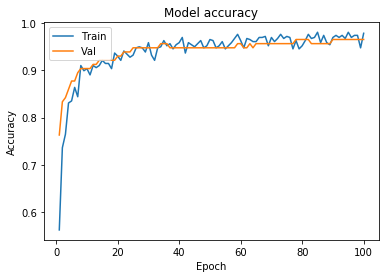

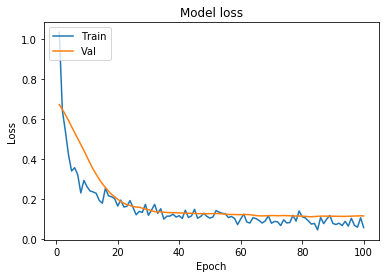

In [19]:
plot_learningCurve(history, epochs)